In [282]:
import numpy as np
import msignal
from scipy import signal
import matplotlib.pyplot as plt

In [283]:
fs = 48000
a = 0.5

(480000,)


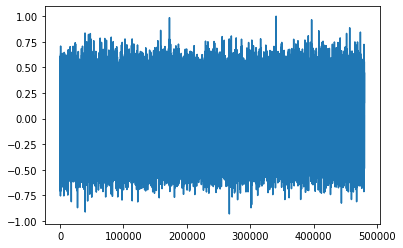

In [284]:
#参照信号
x = msignal.whitenoise(10, fs)
print (x.shape)
plt.plot(x)

(480000,)


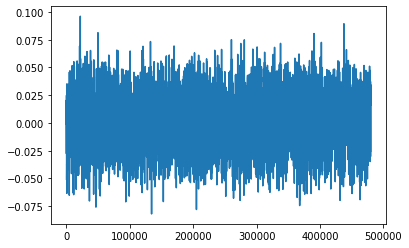

In [285]:
#駆動信号
bandpath = signal.firwin(numtaps=255 , cutoff=[50, 250], pass_zero=False, fs=fs)
d = signal.lfilter(bandpath, 1, x)
print (d.shape)
plt.plot(d)

In [286]:
#プラントGのフィルタ
lowpath_g = signal.firwin(numtaps=255, cutoff=500, fs=fs)

In [287]:
#r
r = signal.lfilter(lowpath_g, 1, x)
#r2 = np.convolve(x, lowpath_g,)
print (r)
#print (r2)

[4.38524508e-05 5.61718235e-05 6.36765053e-05 ... 2.64868669e-02
 2.66897889e-02 2.68697722e-02]


In [288]:
w = np.zeros(480000)
w[0:480000] = 0.5

e = np.zeros(480000)

print (w.shape)

(480000,)


In [ ]:
for n in range(480000):
    #誤差信号[n]
    e[n] = d[n] + np.dot(w[:n], r[:n])
    
    w = w - a * r * e[n]
    

/Users/shugoto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


[0.50040114 0.50008308 0.49939501 0.49919896 0.49915531 0.50003296
 0.50024245 0.49852998 0.49866708 0.49866435 0.49778881 0.49742523
 0.49704305 0.49652274 0.4957427  0.49513608 0.49505707 0.49389113
 0.49341663 0.49318713 0.49305863 0.49197601 0.49156469 0.49203225
 0.49292962 0.49259269 0.49214562 0.49171914 0.49127999 0.48982127
 0.48951512 0.48888933 0.48823714 0.48830404 0.48774862 0.4865801
 0.4860024  0.48525606 0.48570577 0.48636556 0.48566745 0.48468291
 0.48340209 0.48248571 0.48209335 0.48290593 0.481996   0.48139624
 0.48022451 0.47870478 0.47925182 0.4782892  0.47752906 0.4756217
 0.47572434 0.47387295 0.47447241 0.47389993 0.47310866 0.47269708
 0.47124623 0.47047947 0.46910476 0.46835626 0.46802901 0.46693043
 0.46620168 0.46453969 0.46357181 0.46306479 0.46129426 0.45972194
 0.45789192 0.45723435 0.45635708 0.45545732 0.45305973 0.45206566
 0.4513601  0.4501098  0.44998001 0.44949225 0.44867956 0.44710067
 0.44642663 0.44631916 0.44515954 0.44383414 0.44300419 0.440815

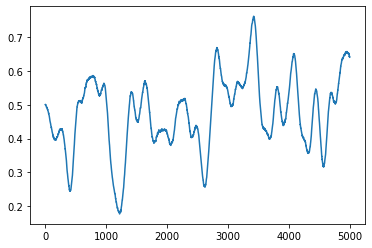

In [272]:

print (w)
plt.plot (w)




[-6.10916764e-05 -4.09339755e-05  5.79967122e-05  1.30507969e-04
  1.93632642e-04  1.19526866e-04  8.52981546e-05  3.29000144e-04
  4.11755321e-04  5.06139293e-04  7.33633462e-04  9.44881978e-04
  1.18459062e-03  1.47226900e-03  1.83617160e-03  2.22864084e-03
  2.58350463e-03  3.10944512e-03  3.61225021e-03  4.11115504e-03
  4.61081130e-03  5.26477785e-03  5.89277035e-03  6.41583827e-03
  6.84040927e-03  7.38960732e-03  7.97923859e-03  8.59715004e-03
  9.24695071e-03  1.00828676e-02  1.08459552e-02  1.16791706e-02
  1.25603730e-02  1.33778752e-02  1.42852779e-02  1.53250222e-02
  1.63569406e-02  1.74550446e-02  1.84233592e-02  1.93277781e-02
  2.03922947e-02  2.15493681e-02  2.28206444e-02  2.41263237e-02
  2.54164019e-02  2.65502654e-02  2.78889413e-02  2.92440640e-02
  3.07281163e-02  3.23471701e-02  3.37578578e-02  3.53595269e-02
  3.69974954e-02  3.88630206e-02  4.05557233e-02  4.25381264e-02
  4.42763909e-02  4.61502934e-02  4.80967966e-02  5.00399979e-02
  5.21693111e-02  5.42948

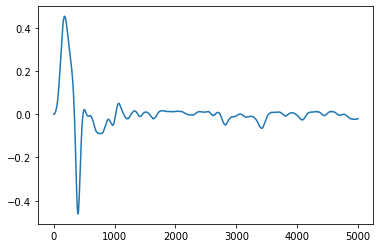

In [273]:
#np.set_printoptions(threshold=np.inf)
plt.plot (e)
print (e)


[ 1.79540975e-04  1.86743117e-04  1.93949750e-04  2.01176814e-04
  2.08425720e-04  2.15682399e-04  2.22916514e-04  2.30080859e-04
  2.37110936e-04  2.43924742e-04  2.50422758e-04  2.56488148e-04
  2.61987183e-04  2.66769878e-04  2.70670854e-04  2.73510419e-04
  2.75095862e-04  2.75222963e-04  2.73677707e-04  2.70238188e-04
  2.64676701e-04  2.56762011e-04  2.46261772e-04  2.32945087e-04
  2.16585201e-04  1.96962292e-04  1.73866343e-04  1.47100089e-04
  1.16481990e-04  8.18492313e-05  4.30607123e-05 -1.69257513e-19
 -4.74217711e-05 -9.92630842e-05 -1.55549334e-04 -2.16270255e-04
 -2.81377509e-04 -3.50782452e-04 -4.24354114e-04 -5.01917406e-04
 -5.83251572e-04 -6.68088922e-04 -7.56113847e-04 -8.46962141e-04
 -9.40220651e-04 -1.03542725e-03 -1.13207117e-03 -1.22959367e-03
 -1.32738909e-03 -1.42480626e-03 -1.52115024e-03 -1.61568452e-03
 -1.70763344e-03 -1.79618513e-03 -1.88049464e-03 -1.95968754e-03
 -2.03286374e-03 -2.09910167e-03 -2.15746276e-03 -2.20699611e-03
 -2.24674349e-03 -2.27574

255


ValueError: operands could not be broadcast together with shapes (3,) (2,) 